In [1]:
# Import dependencies
import os
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Extracted Hand Landmarks: [0.3977823555469513, 0.8969941139221191, 0.557512640953064, 0.783634603023529, 0.654640793800354, 0.6112182140350342, 0.7352741360664368, 0.4646226763725281, 0.816166341304779, 0.3584417402744293, 0.4646477699279785, 0.45751941204071045, 0.4762655794620514, 0.26468679308891296, 0.47533929347991943, 0.14737223088741302, 0.47231632471084595, 0.049102578312158585, 0.3534255027770996, 0.4805848002433777, 0.2752174735069275, 0.29002124071121216, 0.2318369746208191, 0.157350555062294, 0.18803834915161133, 0.04506336897611618, 0.27422603964805603, 0.5536180138587952, 0.22042261064052582, 0.487775593996048, 0.30373913049697876, 0.5982091426849365, 0.3627944588661194, 0.6704386472702026, 0.22019153833389282, 0.6549621224403381, 0.188877135515213, 0.622208297252655, 0.2706158459186554, 0.7049086689949036, 0.3326374292373657, 0.7581055760383606]
Length of landmark data: 42


I0000 00:00:1740626207.644384 19070577 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1740626207.651170 19071799 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740626207.657676 19071799 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740626207.673072 19071810 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


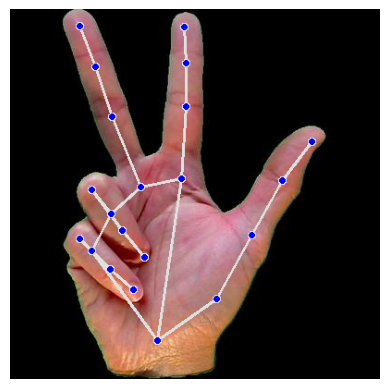

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

def extract_hand_landmarks(image_path):
    """Extracts hand landmarks from an image using MediaPipe and returns the data along with its length."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)
    
    if results.multi_hand_landmarks:
        landmarks = results.multi_hand_landmarks[0]
        data = []
        for landmark in landmarks.landmark:
            data.append(landmark.x)
            data.append(landmark.y)
        data_length = len(data)
        return data, data_length
    return None, 0

def display_image_with_landmarks(image_path):
    """Displays an image with hand landmarks drawn using MediaPipe and prints the length of landmark data."""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            landmarks_data = [(landmark.x, landmark.y) for landmark in hand_landmarks.landmark]
    
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Test example
image_path = '../Dataset/ASL_Main/3/hand1_3_bot_seg_4_cropped.jpeg'  # Replace with actual path
landmarks, length = extract_hand_landmarks(image_path)
if landmarks:
    print(f"Extracted Hand Landmarks: {landmarks}")
    print(f"Length of landmark data: {length}")
    display_image_with_landmarks(image_path)
else:
    print("No hand landmarks detected.")


Hand landmarks for the image: ([0.3977823555469513, 0.8969941139221191, 0.557512640953064, 0.783634603023529, 0.654640793800354, 0.6112182140350342, 0.7352741360664368, 0.4646226763725281, 0.816166341304779, 0.3584417402744293, 0.4646477699279785, 0.45751941204071045, 0.4762655794620514, 0.26468679308891296, 0.47533929347991943, 0.14737223088741302, 0.47231632471084595, 0.049102578312158585, 0.3534255027770996, 0.4805848002433777, 0.2752174735069275, 0.29002124071121216, 0.2318369746208191, 0.157350555062294, 0.18803834915161133, 0.04506336897611618, 0.27422603964805603, 0.5536180138587952, 0.22042261064052582, 0.487775593996048, 0.30373913049697876, 0.5982091426849365, 0.3627944588661194, 0.6704386472702026, 0.22019153833389282, 0.6549621224403381, 0.188877135515213, 0.622208297252655, 0.2706158459186554, 0.7049086689949036, 0.3326374292373657, 0.7581055760383606], 42)
Time taken to extract landmarks: 0.0215 seconds


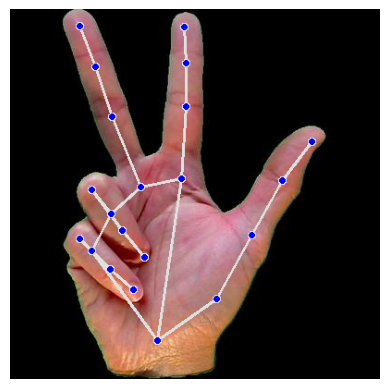

In [3]:
image_path = '../Dataset/ASL_Main/3/hand1_3_bot_seg_4_cropped.jpeg'  # Change to an actual path

start_time = time.time()
landmarks = extract_hand_landmarks(image_path)
end_time = time.time()

time_taken = end_time - start_time

if landmarks:
    print(f"Hand landmarks for the image: {landmarks}")
    print(f"Time taken to extract landmarks: {time_taken:.4f} seconds")
    display_image_with_landmarks(image_path)
else:
    print("No hand landmarks detected for the image.")
    print(f"Time taken to attempt extraction: {time_taken:.4f} seconds")



In [ ]:
import os
import cv2
import time
import pandas as pd
import mediapipe as mp

# Logging and warning settings
import logging
os.environ['GLOG_minloglevel'] = '2'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('mediapipe').setLevel(logging.ERROR)

# Initialize MediaPipe Hands (for images, static_image_mode=True)
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7
)
mp_drawing = mp.solutions.drawing_utils

output_dir = '../Dataset/Generated_Data'
os.makedirs(output_dir, exist_ok=True)

def extract_hand_landmarks(image_path):
    """Extracts hand landmarks from an image using MediaPipe.
    If any landmarks are missing, it fills them with 0s."""
    
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return [0] * 42  # Return all zeros if image fails to load
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Initialize a list of 42 zeros (21 landmarks x, y)
    data = [0] * 42  

    if results.multi_hand_landmarks:
        landmarks = results.multi_hand_landmarks[0]
        
        for i, landmark in enumerate(landmarks.landmark):
            data[i * 2] = landmark.x   # X-coordinate
            data[i * 2 + 1] = landmark.y  # Y-coordinate
        
        return data

    print(f"Not enough landmarks detected in {image_path}. Filling with 0s.")
    return data  # Return the zero-filled list if no hand is detected


def preprocess_and_save_landmarks(
    asl_dir='../Dataset/ASL_Alternate',
    isl_dir='../Dataset/Original',
    output_dir='../Dataset/Generated_Data'
):
    """Extracts hand landmarks for all images in ASL_Main subdirectories, as well as the
    first 100 images from ISL/space and ISL/del, and saves the results to a CSV."""
    data = []
    labels = []
    
    # Process all images from ASL_Main subdirectories
    for label in os.listdir(asl_dir):
        label_path = os.path.join(asl_dir, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                landmarks = extract_hand_landmarks(img_path)
                if landmarks:
                    data.append(landmarks)
                    labels.append(label)
    
    # Process first 100 images for 'space' and 'del' classes from ISL
    for special_label in ['space', 'del']:
        special_dir = os.path.join(isl_dir, special_label)
        if os.path.isdir(special_dir):
            # Sort filenames to have a consistent order and then pick first 100 images
            images = sorted(os.listdir(special_dir))[:100]
            for img_file in images:
                img_path = os.path.join(special_dir, img_file)
                landmarks = extract_hand_landmarks(img_path)
                if landmarks:
                    data.append(landmarks)
                    labels.append(special_label)
    
    # Build DataFrame; assume 21 landmarks x 2 = 42 features
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    columns = [f'x{i}' if i % 2 == 0 else f'y{i//2}' for i in range(42)]
    df = pd.DataFrame(data, columns=columns)
    df['label'] = labels
    
    output_csv_path = os.path.join(output_dir, f'asl_hand_landmark_{timestamp}.csv')
    df.to_csv(output_csv_path, index=False)
    print(f"Hand landmarks saved to: {output_csv_path}")

# Run the function to process images and save the landmarks to CSV
preprocess_and_save_landmarks()


I0000 00:00:1740626809.159026 19070577 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1740626809.166219 19090378 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740626809.170756 19090368 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Not enough landmarks detected in ../Dataset/ASL_Main/r/hand2_r_right_seg_1_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand1_r_dif_seg_5_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand5_r_dif_seg_5_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand5_r_dif_seg_4_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand2_r_left_seg_4_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand5_r_dif_seg_3_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand1_r_dif_seg_4_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand1_r_right_seg_4_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand1_r_right_seg_3_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/ha

In [11]:
def count_labels_in_csv(csv_path):
    """Counts the number of entries for each label in the CSV."""
    df = pd.read_csv(csv_path)
    
    label_counts = df['label'].value_counts()
    
    print("Number of entries for each label:")
    print(label_counts)

# Usage example
csv_path = '../Dataset/Generated_Data/asl_hand_landmark_20250226_192404.csv'  # Replace with your actual path
count_labels_in_csv(csv_path)


Number of entries for each label:
label
space    76
5        70
3        68
9        67
l        67
k        66
4        65
f        64
b        64
7        61
8        59
d        58
u        57
1        57
z        52
i        46
v        46
r        46
x        45
del      45
p        44
g        42
6        41
h        40
w        37
2        36
y        23
c        18
0        15
e        11
q        11
j         9
a         7
s         6
o         3
m         2
n         2
Name: count, dtype: int64


In [12]:
# Load the dataset
csv_path = '../Dataset/Generated_Data/asl_hand_landmark_20250226_192404.csv'  # Change to actual path
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Model Accuracy: 98.04%
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         7
           2       0.80      1.00      0.89         8
           3       1.00      1.00      1.00        16
           4       0.93      1.00      0.97        14
           5       1.00      0.93      0.96        14
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00         8
           a       1.00      1.00      1.00         2
           b       1.00      1.00      1.00        21
           c       1.00      0.50      0.67         2
           d       1.00      0.83      0.91         6
         del       0.92      1.00      0.96        11
           e       1.00      1.00      1.00         3
           f       1.00      1.00      1.00        15
    

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
csv_path = '../Dataset/Generated_Data/asl_hand_landmark_20250226_192404.csv'  # Update this with the correct filename
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Encode labels for XGBoost models
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models to test
models = {
    "GaussianNB": GaussianNB(),
    "SGDClassifier": SGDClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(kernel='linear', probability=True, random_state=42),
    "MLPClassifier": MLPClassifier(max_iter=1000, random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "XGBRFClassifier": XGBRFClassifier(random_state=42)
}

# Dictionary to store results
detailed_results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")

    # Use encoded labels for XGBoost models
    if "XGB" in name:
        model.fit(X_train_enc, y_train_enc)
        y_pred = model.predict(X_test_enc)
        y_pred_decoded = label_encoder.inverse_transform(y_pred)
        accuracy = accuracy_score(y_test, y_pred_decoded)
        precision = precision_score(y_test, y_pred_decoded, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred_decoded, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred_decoded, average='weighted', zero_division=0)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    detailed_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert results to DataFrame and display
detailed_results_df = pd.DataFrame(detailed_results)
print(detailed_results_df)

Training and evaluating GaussianNB...
Training and evaluating SGDClassifier...
Training and evaluating LogisticRegression...
Training and evaluating KNeighborsClassifier...
Training and evaluating DecisionTreeClassifier...
Training and evaluating RandomForestClassifier...
Training and evaluating SVC...
Training and evaluating MLPClassifier...
Training and evaluating XGBClassifier...


/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:40:31] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training and evaluating XGBRFClassifier...
                    Model  Accuracy  Precision    Recall  F1 Score
0              GaussianNB  0.928105   0.946966  0.928105  0.928576
1           SGDClassifier  0.859477   0.819697  0.859477  0.829758
2      LogisticRegression  0.875817   0.846770  0.875817  0.852846
3    KNeighborsClassifier  0.960784   0.979889  0.960784  0.963347
4  DecisionTreeClassifier  0.941176   0.955120  0.941176  0.944760
5  RandomForestClassifier  0.973856   0.976819  0.973856  0.973600
6                     SVC  0.898693   0.894543  0.898693  0.887035
7           MLPClassifier  0.964052   0.968224  0.964052  0.963672
8           XGBClassifier  0.977124   0.981147  0.977124  0.976838
9         XGBRFClassifier  0.866013   0.861249  0.866013  0.853383


Trained MLPClassifier saved to ../Models/mlp_classifier_best_params_asl_v2.pkl
Accuracy: 0.9520
Precision: 0.9550
Recall: 0.9520
F1 Score: 0.9513


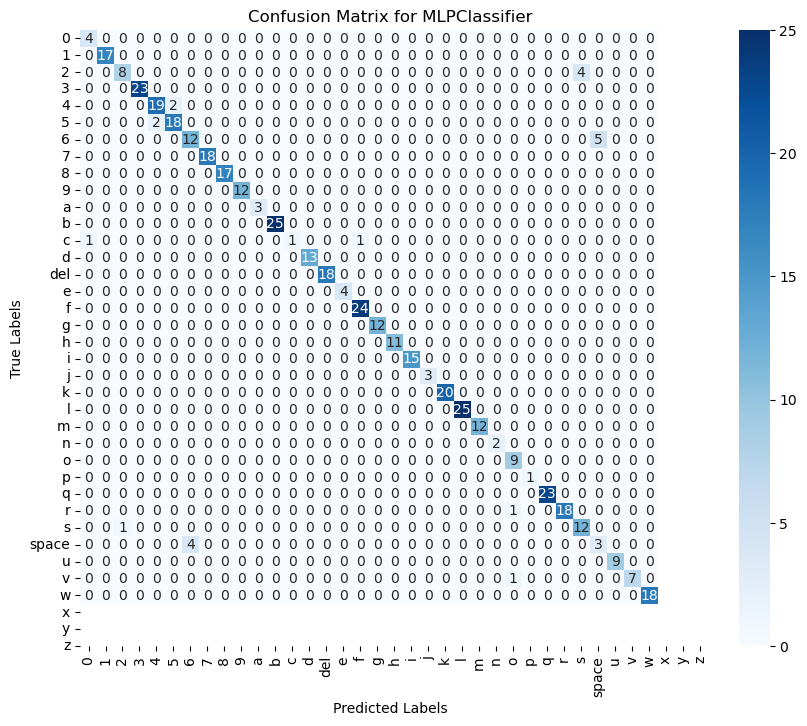

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib

# Ensure the dataset exists before proceeding
csv_path = '../Dataset/Generated_Data/asl_hand_landmark_20250226_192404.csv'  # Update with correct filename
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Train the MLPClassifier with the best parameters and a 30% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the best MLP model
best_mlp = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(128,),
    learning_rate='constant',
    max_iter=1000,
    solver='adam',
    random_state=42
)

# Train the model
best_mlp.fit(X_train, y_train)

# Save the trained model to a .pkl file
model_filename = "../Models/mlp_classifier_best_params_asl_v2.pkl"
joblib.dump(best_mlp, model_filename)

# Model Evaluation
y_pred = best_mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Trained MLPClassifier saved to {model_filename}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for MLPClassifier")
plt.show()
